In [13]:
!git clone https://github.com/ClementPinard/FlowNetPytorch.git

fatal: destination path 'FlowNetPytorch' already exists and is not an empty directory.


In [22]:
%cd FlowNetPytorch/

[Errno 2] No such file or directory: 'FlowNetPytorch/'
/content/FlowNetPytorch


In [6]:
import torch

In [23]:
!python run_inference.py /content/ /content/drive/MyDrive/Colab_Notebooks/pytorch/flownets_EPE1.951.pth

=> will save raw output and RGB visualization
=> fetching img pairs in '/content/'
=> will save everything to /content/flow
1 samples found
=> using pre-trained model 'flownets'
  0% 0/1 [00:00<?, ?it/s]/content/FlowNetPytorch/run_inference.py:91: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = input_transform(imread(img1_file))
/content/FlowNetPytorch/run_inference.py:92: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = input_transform(imread(img2_file))
100% 1/1 [00:03<00:00,  3.52s/it]


**Lucas Kanade**

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
def pad(img,k):
  img=np.insert(img,img.shape[0],img[img.shape[0]-1,:],axis=0)
  img=np.insert(img,img.shape[1],img[:,img.shape[1]-1],axis=1)
  for i in range(k//2):
      img=np.insert(img,img.shape[0],img[img.shape[0]-1,:],axis=0)
      img=np.insert(img,img.shape[1],img[:,img.shape[1]-1],axis=1)
      img=np.insert(img,0,img[0,:],axis=0)
      img=np.insert(img,0,img[:,0],axis=1)
  return img

def LN(str1,str2,str3):
  gt=np.load(str3)
  img_1=cv2.cvtColor(cv2.imread(str1),cv2.COLOR_BGR2GRAY).astype(np.float32)
  img_2=cv2.cvtColor(cv2.imread(str2),cv2.COLOR_BGR2GRAY).astype(np.float32)
  w=3
  for kernel in [3]:
      img1=pad(img_1,kernel)
      img2=pad(img_2,kernel)
      r,c=img1.shape
      I_x=np.zeros((r-1,c-1))
      I_y=np.zeros((r-1,c-1))
      I_t=np.zeros((r-1,c-1))
      for i in range(r-1):
        for j in range(c-1):
          I_x[i,j]=0.25*(img1[i+1,j]+img2[i+1,j]+img1[i+1,j+1]+img2[i+1,j+1]-(img1[i,j]+img2[i,j]+img1[i,j+1]+img2[i,j+1]))
          I_y[i,j]=0.25*(img1[i,j+1]+img2[i,j+1]+img1[i+1,j+1]+img2[i+1,j+1]-(img1[i,j]+img2[i,j]+img1[i+1,j]+img2[i+1,j]))
          I_t[i,j]=0.25*(img2[i,j+1]+img2[i+1,j+1]+img2[i+1,j]+img2[i,j]-(img1[i,j+1]+img1[i+1,j+1]+img1[i+1,j]+img1[i,j]))
      optical_flow=np.zeros((r-kernel,c-kernel))
      r,c=optical_flow.shape
      for i in range(kernel//2,r+kernel//2):
        for j in range(kernel//2,c+kernel//2):
          A=np.zeros((kernel*kernel,2))
          b=np.zeros((kernel*kernel,1))
          l=0
          for m in range(i-kernel//2,i+kernel//2+1):
            for n in range(j-kernel//2,j+kernel//2+1):
              A[l][0]=I_x[m,n]
              A[l][1]=I_y[m,n]
              b[l][0]=-I_t[m,n]
              l+=1
          h=(A.T@A)
          if (np.linalg.det(h)!=0):
            u=(np.linalg.inv(h)@A.T@b)
          else :
            u=np.array([[0],[0]])
          optical_flow[i-kernel//2,j-kernel//2]=((u[1,0])**2 + (u[0,0])**2 )**0.5
      w+=1
      MSE=np.square(gray_image-gt).mean()
      print(f' For patch size = {kernel} X {kernel}, MSE = {MSE}.')

In [17]:
LN()

NameError: name 'gray_image' is not defined

In [9]:
!pip install -r /content/FlowNetPytorch/requirements.txt

  Using cached spatial_correlation_sampler-0.5.0.tar.gz (9.8 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
  Using cached path-16.10.0-py3-none-any.whl (25 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for spatial-correlation-sampler (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for spatial-correlation-sampler
Failed to build spatial-correlation-sampler
ERROR: Could not build wheels for spatial-correlation-sampler, which is required to install pyproject.toml-based projects


In [19]:
!pip install path

  Using cached path-16.10.0-py3-none-any.whl (25 kB)


In [11]:
!python3 /content/FlowNetPytorch/run_inference.py /content/ /content/drive/MyDrive/Colab_Notebooks/pytorch/flownets_EPE1.951.pth

Traceback (most recent call last):
  File "/content/FlowNetPytorch/run_inference.py", line 2, in <module>
    from path import Path
ModuleNotFoundError: No module named 'path'


In [12]:
gray_image=255-gray_image

NameError: name 'gray_image' is not defined

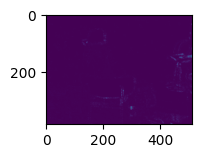

In [ ]:
optical_flow = LN("/content/img1.jpg","/content/img2.jpg","/content/GT1.npy")

In [ ]:
import cv2

# Load the image
imgflow1 = cv2.imread('/content/img1.jpgflow.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(imgflow1, cv2.COLOR_BGR2GRAY)

array([[30, 30, 30, ..., 30, 30, 30],
       [30, 30, 30, ..., 30, 30, 30],
       [30, 30, 30, ..., 30, 30, 30],
       ...,
       [30, 31, 30, ..., 30, 30, 30],
       [30, 30, 30, ..., 30, 30, 30],
       [30, 30, 30, ..., 30, 30, 30]], dtype=uint8)
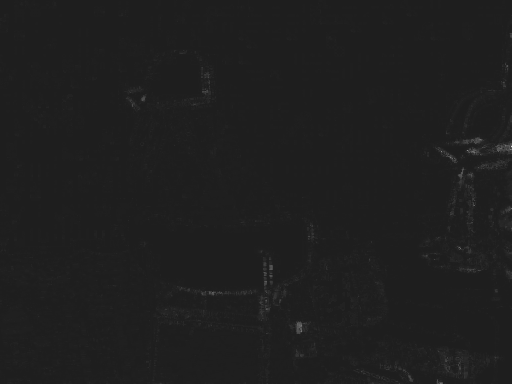

In [ ]:
gray_image

In [ ]:
import subprocess

# Execute the command
subprocess.run(["python", "/main.py", "/path/to/flying_chairs/", "-b8", "-j8", "-a", "flownets"])

CompletedProcess(args=['python', '/main.py', '/path/to/flying_chairs/', '-b8', '-j8', '-a', 'flownets'], returncode=2)

In [ ]:
subprocess.run(["python", "/main.py","-h"])

CompletedProcess(args=['python', '/main.py', '-h'], returncode=2)

In [ ]:
log_directory = '/content/drive/MyDrive/Colab Notebooks/pytorch/'

# Run TensorBoard with the specified log directory
subprocess.run(["tensorboard", "--logdir", log_directory])

KeyboardInterrupt: 

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import requests
import os

def download_file(url, save_path):


    response = requests.get(url, stream=True)

    if response.status_code == 200:
        # Open the file for writing in binary mode
        with open(save_path, 'wb') as f:
            # Iterate over the response content in chunks and write to the file
            for chunk in response.iter_content(chunk_size=1024):
                if chunk:
                    f.write(chunk)
        print("Download successful.")
    else:
        print(f"Failed to download file. Status code: {response.status_code}")

# URL of the dataset ZIP file
url = "https://lmb.informatik.uni-freiburg.de/data/FlyingChairs/FlyingChairs.zip"
# Directory where you want to save the downloaded file
save_dir = "./content"
# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)
# File path to save the downloaded ZIP file
file_path = os.path.join(save_dir, "FlyingChairs.zip")

# Download the file
download_file(url, file_path)


Download successful.


In [ ]:
%matplotlib inline

In [ ]:
!pip install av
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import torchvision.transforms as T
import tempfile
from pathlib import Path
from urllib.request import urlretrieve
from torchvision.io import read_video



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 13.8 MB/s eta 0:00:00


In [ ]:
!pip uninstall av -y
!pip install av


Found existing installation: av 11.0.0
Uninstalling av-11.0.0:
  Successfully uninstalled av-11.0.0
  Using cached av-11.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (32.9 MB)


In [ ]:
!pip install git+https://github.com/mikeboers/PyAV.git


  Cloning https://github.com/mikeboers/PyAV.git to /tmp/pip-req-build-he2mhtuz
  Running command git clone --filter=blob:none --quiet https://github.com/mikeboers/PyAV.git /tmp/pip-req-build-he2mhtuz
  Resolved https://github.com/mikeboers/PyAV.git to commit 4984b8dc35d7d3048f00076362fb7815716842d1
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
import av


ModuleNotFoundError: No module named 'av._core'

**RAFT Model**

In [41]:
!pip install torchvision

In [40]:
from torchvision.utils import save_image
from torchvision.io import read_video

In [41]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import torchvision.transforms as T


plt.rcParams["savefig.bbox"] = "tight"
# sphinx_gallery_thumbnail_number = 2


def plot(imgs, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0])
    _, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            img = F.to_pil_image(img.to("cpu"))
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    plt.tight_layout()

In [64]:
video_path = '/content/IMG_1207.MOV'

In [ ]:
#!pip install av

In [65]:
get_ipython().system('pip install pyAV')

In [66]:
import av


In [67]:
av.__version__

'12.0.0'

/usr/local/lib/python3.10/dist-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


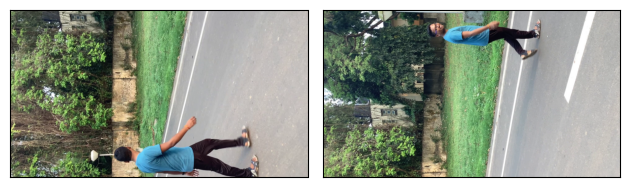

In [68]:
from torchvision.io import read_video
frames, _, _ = read_video(str(video_path))
frames = frames.permute(0, 3, 1, 2)  # (N, H, W, C) -> (N, C, H, W)
x=frames.shape
img1_batch = torch.stack([frames[10], frames[(x[0]-1)]])
img2_batch = torch.stack([frames[11], frames[x[0]-1]])

plot(img1_batch)

In [48]:
x=frames.shape
print(x[0])

110


In [69]:
def preprocess(batch):
    transforms = T.Compose(
        [
            T.ConvertImageDtype(torch.float32),
            T.Normalize(mean=0.5, std=0.5),  # map [0, 1] into [-1, 1]
            T.Resize(size=(520, 960)),
        ]
    )
    batch = transforms(batch)
    return batch


# If you can, run this example on a GPU, it will be a lot faster.
#device = "cuda" if torch.cuda.is_available() else "cpu"

#img1_batch = preprocess(img1_batch).to(device)
#img2_batch = preprocess(img2_batch).to(device)

#print(f"shape = {img1_batch.shape}, dtype = {img1_batch.dtype}")

In [70]:
from torchvision.models.optical_flow import raft_large

model = raft_large(pretrained=True, progress=False).to(device)
model = model.eval()

'''list_of_flows = model(img1_batch.to(device), img2_batch.to(device))
print(f"type = {type(list_of_flows)}")
print(f"length = {len(list_of_flows)} = number of iterations of the model")'''

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Raft_Large_Weights.C_T_SKHT_V2`. You can also use `weights=Raft_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


'list_of_flows = model(img1_batch.to(device), img2_batch.to(device))\nprint(f"type = {type(list_of_flows)}")\nprint(f"length = {len(list_of_flows)} = number of iterations of the model")'

In [47]:
predicted_flows = list_of_flows[-1]
print(f"dtype = {predicted_flows.dtype}")
print(f"shape = {predicted_flows.shape} = (N, 2, H, W)")
print(f"min = {predicted_flows.min()}, max = {predicted_flows.max()}")

dtype = torch.float32
shape = torch.Size([2, 2, 520, 960]) = (N, 2, H, W)
min = -22.47303581237793, max = 5.5421953201293945


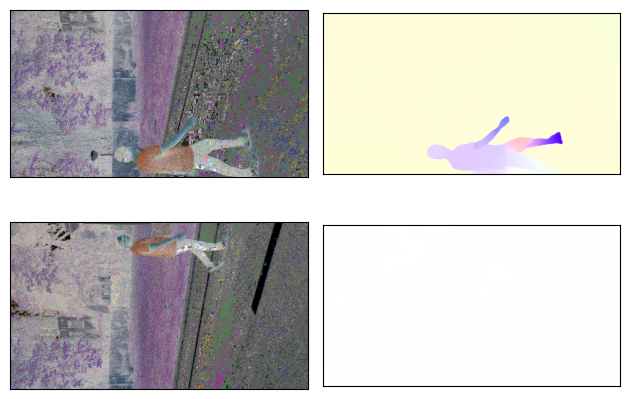

In [71]:
from torchvision.utils import flow_to_image

flow_imgs = flow_to_image(predicted_flows)

# The images have been mapped into [-1, 1] but for plotting we want them in [0, 1]
img1_batch = [(img1 + 1) / 2 for img1 in img1_batch]

grid = [[img1, flow_img] for (img1, flow_img) in zip(img1_batch, flow_imgs)]
plot(grid)

In [72]:
def preprocess_video(video_path,save_file):
  frames,_,_=read_video(video_path)
  frames=frames.permute(0,3,1,2)
  k=29
  for i in range(0,len(frames)-5,8):
    img1_batch=torch.stack([frames[i]])
    img2_batch=torch.stack([frames[i+4]])
    img1_batch=preprocess(img1_batch)
    img2_batch=preprocess(img2_batch)
    list_of_flows=model(img1_batch,img2_batch)
    predicted_flows=list_of_flows[-1]
    flow_images=flow_to_image(predicted_flows)
    img1_batch=[(img1+1)/2 for img1 in img1_batch]
    imgpath1='Target_frame/'+str({k+1})+'.png'
    imgpath2='Reference_frame/'+str({k+1})+'.png'
    gt_path='flow/'+str({k+1})+'.png'
    k+=1
    save_image(img1_batch[0],os.path.join(save_file,imgpath1))
    save_image(img2_batch[0],os.path.join(save_file,imgpath2))
    save_image(predicted_flows,os.path.join(save_file,gt_path))

In [73]:
save_file='/content/drive/MyDrive/Dataset/dataset_flow'

In [74]:
video_path='/content/drive/MyDrive/Dataset/dataset_flow'
frames,_,_=read_video(video_path)
frames = frames.permute(0, 3, 1, 2)  # (N, H, W, C) -> (N, C, H, W)

In [75]:
frames.shape

torch.Size([0, 3, 1, 1])

In [76]:
torch.Size([73,3,1080,1920])

torch.Size([73, 3, 1080, 1920])

In [77]:
preprocess_video(video_path,save_file)

In [79]:
import torchvision.transforms as transforms

In [80]:
import os
import torch

In [4]:
!git clone https://github.com/ClementPinard/FlowNetPytorch

fatal: destination path 'FlowNetPytorch' already exists and is not an empty directory.


In [5]:
%cd FlowNetPytorch/

/content/FlowNetPytorch


In [6]:
!pip install -r requirements.txt

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [17]:
!python main.py /content/drive/MyDrive/Dataset/new_data --pretrained /content/drive/MyDrive/Colab_Notebooks/pytorch/flownets_EPE1.951.pth --epochs 10 --lr 0.00001 -b2 -j2 -a flownets

2024-03-23 17:39:41.252529: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 17:39:41.252600: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 17:39:41.254522: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-23 17:39:42.725540: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
=> will save everything to flying_chairs/03-23-17:39/flownets,adam,10epochs,epochSize1000,b2,lr1e-05
=> fetching img pairs in '/content/drive/MyDrive/Dataset/new_data'
38 samples found, 25 train samples and 13 test samples 
=> using pre-trai

In [34]:
!python3 run_inference.py /content/ /content/FlowNetPytorch/flying_chairs/03-23-17:39/flownets,adam,10epochs,epochSize1000,b2,lr1e-05/model_best.pth.tar

=> will save raw output and RGB visualization
=> fetching img pairs in '/content/'
=> will save everything to /content/flow
1 samples found
=> using pre-trained model 'flownets'
  0% 0/1 [00:00<?, ?it/s]/content/FlowNetPytorch/run_inference.py:91: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = input_transform(imread(img1_file))
/content/FlowNetPytorch/run_inference.py:92: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = input_transform(imread(img2_file))
100% 1/1 [00:03<00:00,  3.75s/it]


In [25]:
import cv2

In [26]:
image = cv2.imread('/content/flow/imgflow.png')
#resize the image to 96x128
resized_image=cv2.resize(image,(512,384))
gray_image=cv2.cvtColor(resized_image,cv2.COLOR_BGR2GRAY)

In [30]:
import numpy as np
gt=np.load('/content/GT1.npy')

In [27]:
gray_image=255-gray_image

In [31]:
MSE=np.square(gray_image-gt).mean()

In [32]:
print(MSE)

58.289524
